# Introduction

The reputation of a bank starts from customer loyalty. In order for a bank to increase customer retention, we need to be able to analyze our existing customer database and ask the question "what drives customers to leave?". 

In order to answer this question and find a solution to reduce attrition, the team took a sample datatset of customers in France, Spain and Germany. This notebook serves as a blueprint for importing bank customer data, initial data analysis, cleaning it as well as analyzing it. We understand that customers are the key asset for a bank's success and it's much easier to retain an existing customer than acquiring a new one. With this dataset, we want to explore the given features of our customers, analyze it and provide a tool for our banks to pinpoint which customers they predict will churn and take preventative measures to increase customer loyalty.

## Business Understanding



# Data Understanding - Exploratory Data Analysis

# Introduction

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
df = pd.read_csv("bank_churn2.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


At first look our key features besides customer_id and churn are:
- credit_score
- country
- gender
- age
- tenure
- balance
- products_number
- credit_card
- active_member
- estimated_salary

In [39]:
df.shape

(10000, 12)

There are 10,000 values in our dataset; a pretty large and even amount of datapoints for analysis. Let's dive deeper and see if there needs to be any cleaning done to the dataset.

In [40]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
churn,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


Takeaways - First Glance
- Average age of customers is approximately 39 years old
- Follow up on the previous point, average salary is about 100k. I wonder what currency this is considering that it is in three different countries or if it has been converted to USD **(Let's assume it's USD)**
- On average, churn rate is about 20% (considering that churn is a binary feature)
- Value counts of every feature match, which means there aren't any missing values in this data set
- Max tenure of the customers of this dataset is 10 years, but on average the tenure is 5 years. This seems like a really short time considering the age range of the customers.

Assumptions
- If active_member is 0 that means that they are idle customers and if it is 1 that means that they are an active customer with an active account.
- Tenure is number of years that a customer has been a part of the bank

In [41]:
df['churn'].value_counts() / len(df['churn'])

0    0.7963
1    0.2037
Name: churn, dtype: float64

20.37% of customers have churned in the dataset. Let's dive deeper to see if there are any features that might be correlated or influence churn.

Current Customers (0) vs. Customers Churned (1)
0    7963
1    2037
Name: churn, dtype: int64


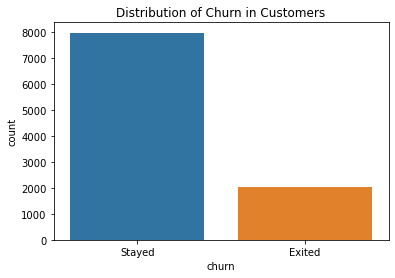

In [42]:
print('Current Customers (0) vs. Customers Churned (1)')
print(df.churn.value_counts())

ax = sns.countplot(data=df,x = 'churn')
ax.set_xticklabels(['Stayed','Exited'])
ax.set_title("Distribution of Churn in Customers");

We do have a biased dataset in the sense that there are a lot more customers that stayed rather than churned. This is a note for our modeling to balance out our dataset to have a less biased prediction.

In [43]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are no missing values in any of the columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are two categorical variables: country and gender. The rest of our variables are either floats or integers.

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


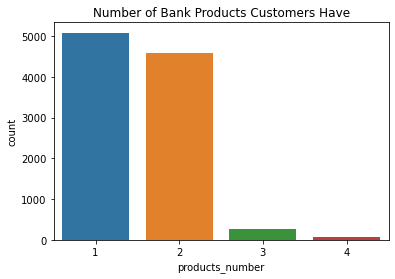

In [46]:
print(df["products_number"].value_counts())
ax = sns.countplot(data=df,x='products_number')

ax.set_title("Number of Bank Products Customers Have");

<AxesSubplot:xlabel='products_number'>

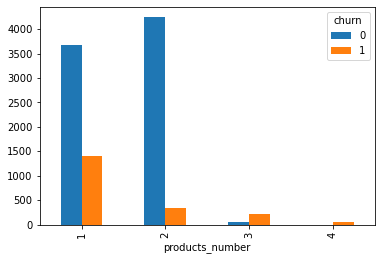

In [47]:
df.groupby(["products_number", "churn"]).size().unstack(level=1).plot(kind='bar')

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


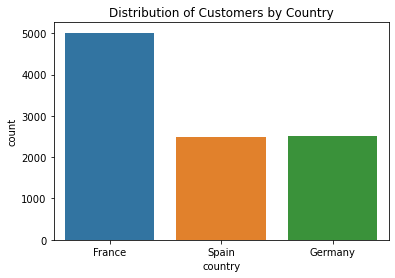

In [48]:
print(df["country"].value_counts())
ax = sns.countplot(data=df,x='country')
ax.set_title("Distribution of Customers by Country");

- The countries for this dataset are from **France, Germany, and Spain**. How does this impact our analysis?

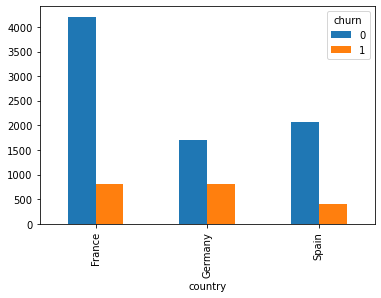

In [49]:
df.groupby(["country", "churn"]).size().unstack(level=1).plot(kind='bar');

Male      5457
Female    4543
Name: gender, dtype: int64


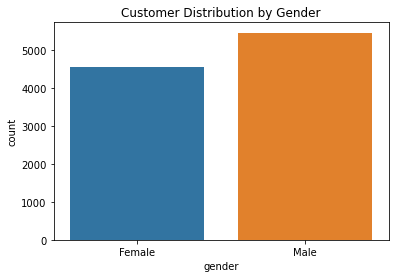

In [50]:
print(df.gender.value_counts())
ax = sns.countplot(data=df,x='gender')
ax.set_title("Customer Distribution by Gender");

- The gender distribution is almost split evenly, but there are more male customers than female

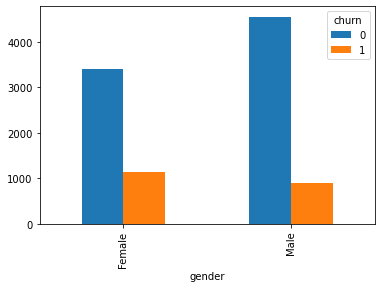

In [51]:
df.groupby(["gender", "churn"]).size().unstack(level=1).plot(kind='bar');

In [52]:
df.duplicated().sum()

0

- There are no duplications in the dataset either, so the dataset is pretty clean to move onto visualizations

<AxesSubplot:>

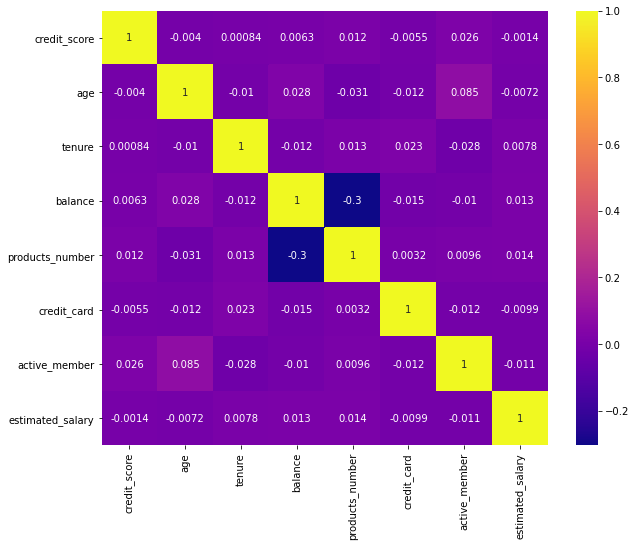

In [53]:
#Visualizing correlations between the features using a heatmap
df2 = df.drop(["churn","customer_id"], axis=1)
corr = df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True, cmap='plasma')

- The top three most **positively correlated** values are:
    - **age vs. active_member:** 0.085
    - **age vs. balance:** 0.028
    - **credit_score vs. active_member:** 0.026


- The most **negatively correlated** values is:
    - **balance vs. products_number:** -0.3

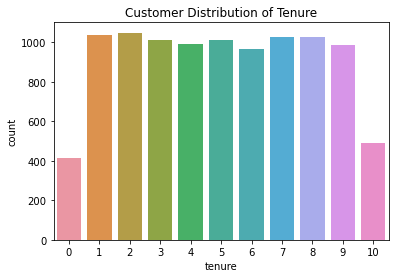

In [54]:
ax = sns.countplot(data = df, x='tenure')
ax.set_title("Customer Distribution of Tenure");

<AxesSubplot:xlabel='country', ylabel='Count'>

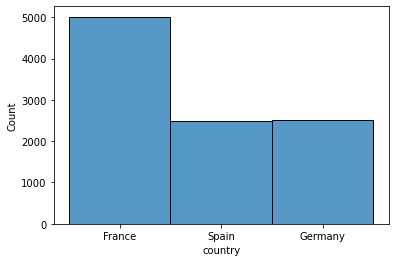

In [55]:
sns.histplot(df['country'])

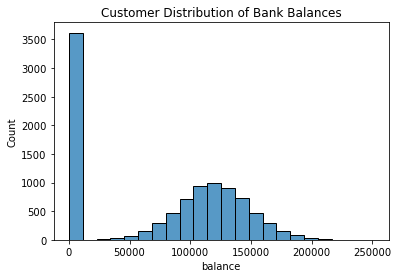

In [56]:
ax = sns.histplot(df['balance'])
ax.set_title("Customer Distribution of Bank Balances");

- Most people have a balance of 0 maybe 20% of the people who churn come from this category

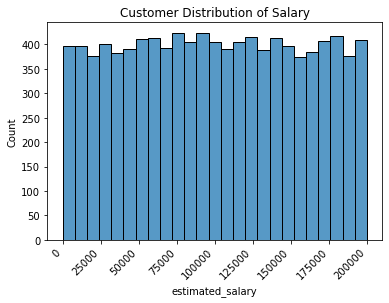

In [57]:
ax = sns.histplot(df['estimated_salary'], bins=25)
plt.xticks(rotation=45, ha='right')
ax.set_title("Customer Distribution of Salary");

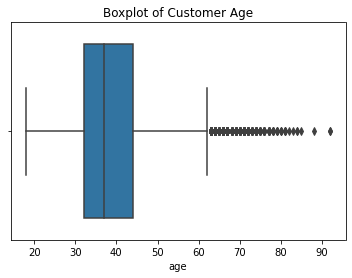

In [58]:
ax = sns.boxplot(data = df, x='age')
ax.set_title("Boxplot of Customer Age");

## Modeling



### Multiple Logistic Regression

In [59]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

In [60]:
import statsmodels.api as sm

X = df[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X = sm.add_constant(X)
y = df['churn']

In [61]:
model = sm.OLS(y, X).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     157.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          4.68e-309
Time:                        21:14:35   Log-Likelihood:                -4361.3
No. Observations:               10000   AIC:                             8745.
Df Residuals:                    9989   BIC:                             8824.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1083      0.034  

###### According to the F-Statistic p-value it seems as though the value is much lower than the set alpha of 0.05, indicating that the model is statistically significant.

### Comparing Logistic Regression without Dataset Values of Zero Balance

<AxesSubplot:xlabel='balance', ylabel='Count'>

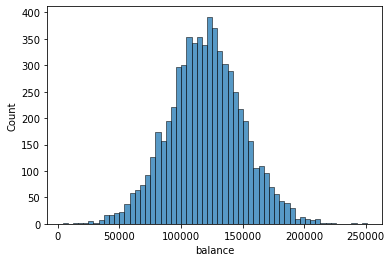

In [62]:
df2 = df[df['balance'] != 0].copy()
sns.histplot(df2['balance'])

In [63]:
df2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1


In [64]:
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X2 = df2[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X2 = sm.add_constant(X2)
y2 = df2['churn']

model = sm.OLS(y2, X2).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.79e-208
Time:                        21:14:59   Log-Likelihood:                -3134.0
No. Observations:                6383   AIC:                             6290.
Df Residuals:                    6372   BIC:                             6364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1782      0.048  

- The R-Squared value for the logistic regression of data without the balance of zero is higher than with the data that included the zero balance.
- 0.145 as an R Squared value is still pretty low and indicates there are more independent variables beyond the scope of the dataset that influences the variance of the churn.
- The probability of F-statistic is still lower than the alpha value of 0.05 indicating that this model is still significant.

**We are going to move forward with our analysis to exclude customers with zero balance. From a business understanding perspective, we believe that there isn't a chance for banks to make a profit from customers who do not have any contributions to the bank. However, for future analysis, this would be a great opportunity to see why there are so many customers with a zero balance.**

In [65]:
df2.shape

(6383, 12)

In [66]:
#How many customers had zero balance in their accounts?
10000-6383

3617

### Feature Importance

In [67]:
import statsmodels.api as sm

# plotting
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, 
                             roc_auc_score)

In [68]:
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X = df2.drop(['customer_id','churn'], axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [71]:
# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.476947
         Iterations 6


In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 6383
Model:                          Logit   Df Residuals:                     6372
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.1360
Time:                        21:31:06   Log-Likelihood:                -3044.4
converged:                       True   LL-Null:                       -3523.4
Covariance Type:            nonrobust   LLR p-value:                2.010e-199
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.7435      0.309    -12.104      0.000      -4.350      -3.137
credit_score        -0.0006      0.000     -1.883      0.060      -0.001    2.53e-05
country              0.1377      0.043      3.227      0.001       0.054       0.221
gender              -0.5197      0.064     -8.149      0.000      -0.645      -0.395
age                  0.0739      0.003     23.901      0.000       0.068       0.080
tenure              -0.0101      0.011     -0.925      0.355      -0.032       0.011
balance           1.835e-06   1.06e-06      1.729      0.084   -2.45e-07    3.91e-06
products_number      0.3045      0.052      5.832      0.000       0.202       0.407
credit_card         -0.0050      0.069     -0.072      0.943      -0.141       0.131
active_member       -1.0649      0.067    -15.900      0.000      -1.196      -0.934
estimated_salary  1.631e-07   5.57e-07      0.293      0.770   -9.28e-07    1.25e-06
====================================================================================
"""

With the default alpha value being 0.05, the table above tells us that credit_score, tenure, balance, credit_card, and estimated_salary are NOT significant features for churn. This leaves: country, gender, age, products_number, and active_member.

C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Text(0.5, 1.0, 'Out-of-Bag Error')

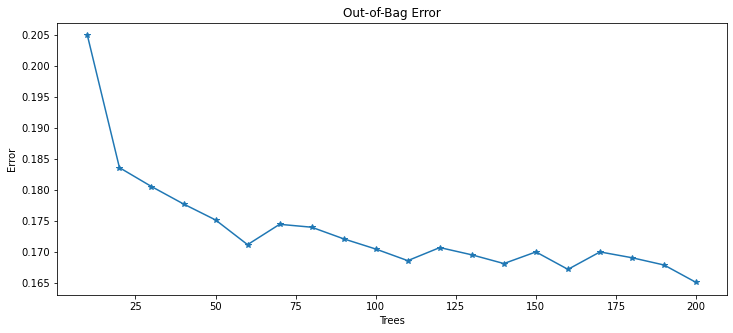

In [117]:
trees = np.linspace(10, 200, 20, dtype=np.int16)

OOB_Score = []
for num_trees in trees:
    rf = RandomForestClassifier(n_estimators=num_trees, warm_start=True, oob_score=True).fit(X_train, y_train)
    OOB_Score.append(1-rf.oob_score_)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(trees, OOB_Score, '-*')
ax.set_xlabel('Trees')
ax.set_ylabel('Error')
ax.set_title('Out-of-Bag Error')

In [118]:
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [119]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print('Accuracy of Random Forest', rf_accuracy)

Accuracy of Random Forest 0.8410061699098244


<AxesSubplot:>

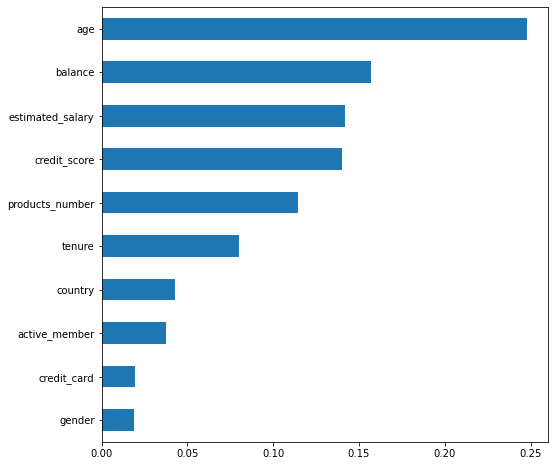

In [120]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize=(8,8))
forest_importances.sort_values().plot.barh(ax=ax)

- Interestingly enough it doesn't seem as though being an active member is as an important feature as we thought
- Let's take a deeper dive into these features

In [121]:
bins = [15, 20, 25, 30, 35, 40, 45, 50 , 55, 60, 65, 70, 75, 80, 85, 90, 95]
pd.crosstab(df['churn'], pd.cut(df['age'], bins), normalize=True)

age,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]","(85, 90]","(90, 95]"
churn,,,,,,,,,,,,,,,,
0,0.0084,0.0481,0.1255,0.1986,0.1927,0.1076,0.0456,0.0192,0.0157,0.012,0.0107,0.0078,0.0033,0.0008,0.0001,0.0002
1,0.0005,0.0041,0.0102,0.0199,0.0339,0.0394,0.0394,0.0269,0.0179,0.008,0.0024,0.0010,0.0000,0.0001,0.0000,0.0000


<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

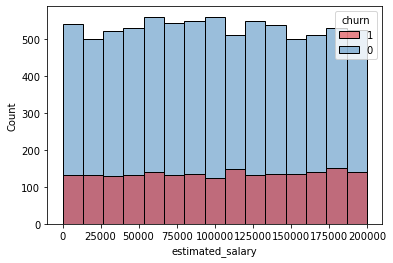

In [122]:
sns.histplot(x = "estimated_salary", hue = "churn", data = df,bins = 15, palette = "Set1", hue_order = [1,0])

- There doesn't seem to be a specific trend to churn when it comes to estimated salary

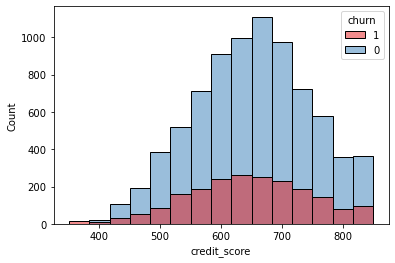

In [123]:
sns.histplot(x = "credit_score", hue = "churn", data = df,bins = 15, palette = "Set1", hue_order = [1,0]);

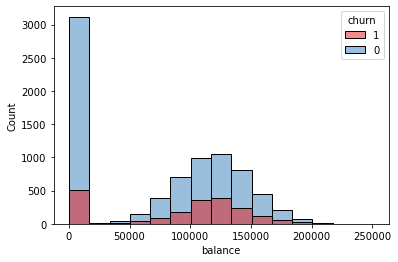

In [124]:
#With values with balance of zero included
sns.histplot(x = "balance", hue = "churn", data = df,bins = 15, palette = "Set1", hue_order = [1,0]);

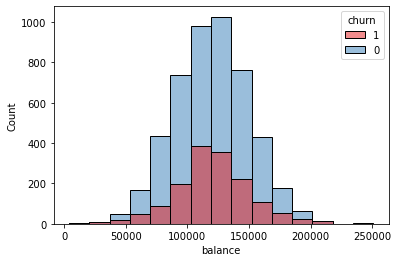

In [125]:
#Excluded datapoints with balance of zero
sns.histplot(x = "balance", hue = "churn", data = df2,bins = 15, palette = "Set1", hue_order = [1,0]);

### Modelling + Accuracy Scoring

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
#Encoding categorical labels for modelling

from sklearn.preprocessing import LabelEncoder

df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X = df2.drop(['customer_id','churn'], axis=1)
y = df2['churn']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [130]:
#Model Training for Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

#Creating a dictionary of models with their names
models = {'Logistic Regression':LR(), 
          'Decision Tree':DT(),
          'Random Forest': RF()}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy : {accuracy_score(y_test,y_pred)} ")

Logistic Regression Accuracy : 0.7807361002349256 
Decision Tree Accuracy : 0.7744714173844949 
Random Forest Accuracy : 0.8402505873140172 


- According to what we found, amongst the three models Random Forest Classifier has the highest accuracy. While it isn't as close to 1 it is a reasonable value of at least 85% accuracy for our model

In [131]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)


def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sc.fit_transform(features)
    prediction = rf.predict(features).reshape(1,-1)
    return prediction[0]

In [132]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [133]:
credit_score = 699
country = 0
gender = 0
age= 39
tenure= 1
balance = 0.00
products_number= 2
credit_card = 0
active_member = 0
estimated_salary = 93826.63

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

if pred == 1:
    print("No longer a bank customer")
else:
    print("Still a bank customer")

Still a bank customer


### Abby's Code

In [134]:
lrmodel = LR().fit(X_train,y_train)
predicted_probabilities = lrmodel.predict_proba(X_test)
print(predicted_probabilities[:,1])
#append predicted probabilities in new df and sort by highest probability in descending order, gives us customer most likely to churn

[0.14790713 0.24507355 0.12697435 ... 0.26354972 0.16314917 0.11592933]


In [135]:
print("Predicted Probabilities:")
for probs in predicted_probabilities:
    formatted_probs = [f"{prob:.2f}" for prob in probs]
    print(formatted_probs)

Predicted Probabilities:
['0.85', '0.15']
['0.75', '0.25']
['0.87', '0.13']
['0.90', '0.10']
['0.92', '0.08']
['0.85', '0.15']
['0.75', '0.25']
['0.71', '0.29']
['0.85', '0.15']
['0.95', '0.05']
['0.84', '0.16']
['0.90', '0.10']
['0.86', '0.14']
['0.84', '0.16']
['0.79', '0.21']
['0.90', '0.10']
['0.94', '0.06']
['0.78', '0.22']
['0.92', '0.08']
['0.82', '0.18']
['0.77', '0.23']
['0.89', '0.11']
['0.71', '0.29']
['0.73', '0.27']
['0.85', '0.15']
['0.82', '0.18']
['0.61', '0.39']
['0.59', '0.41']
['0.47', '0.53']
['0.92', '0.08']
['0.38', '0.62']
['0.94', '0.06']
['0.95', '0.05']
['0.68', '0.32']
['0.50', '0.50']
['0.80', '0.20']
['0.81', '0.19']
['0.71', '0.29']
['0.97', '0.03']
['0.78', '0.22']
['0.73', '0.27']
['0.77', '0.23']
['0.74', '0.26']
['0.77', '0.23']
['0.96', '0.04']
['0.86', '0.14']
['0.77', '0.23']
['0.65', '0.35']
['0.88', '0.12']
['0.31', '0.69']
['0.41', '0.59']
['0.88', '0.12']
['0.53', '0.47']
['0.91', '0.09']
['0.95', '0.05']
['0.85', '0.15']
['0.45', '0.55']
['0.30

<AxesSubplot:ylabel='Feature'>

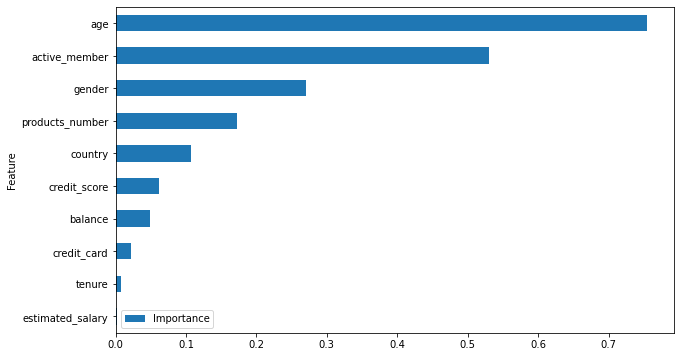

In [136]:
coefficients = lrmodel.coef_
 
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
# copy = df.drop(columns = ['churn', 'customer_id'])



# xdf = pd.DataFrame(sc.inverse_transform(X_test), columns=copy.columns) #multiply by sd and then subtract from mean; only columns you need to - can print out parameters 

# xdf.head()

# xdf['pred'] = predicted_probabilities[:,1]

In [ ]:
# copy = df.drop(columns = ['churn', 'customer_id'])



# xdf = pd.DataFrame(sc.inverse_transform(X_test), columns=copy.columns) #multiply by sd and then subtract from mean; only columns you need to - can print out parameters 

# xdf.head()

# xdf['pred'] = predicted_probabilities[:,1]

In [ ]:
# sc.mean_

In [ ]:
# y_test['preds'] = predicted_probabilities
# y_test['preds']

# y_test['preds'][:,1]

# df_out = 

# df_out = pd.merge(df,y_test['preds'][:,1],how = 'left',left_index 

## Evaluation



# Results